In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import seaborn as sns

In [8]:
sns.set(style='whitegrid')

# Kozmikus részecskék mérése
## 1. feladat: Ismerkedés a műszerrel
Győződjön meg arról, hogy minden eszköz alapvető működését és kezelését ismeri!
Kapcsolja be a számláló elektronikát, majd kapcsolja be a detektor tápegységét, ha szükséges kérjen oktatói segítséget.

Adjon a fotoelektron-sokszorozókra a rájuk írt értéknek megfelelő nagyfeszültséget! 
Figyelje meg a számláló áramkörből kivezetett LEDek villanásait, sokszor szemmel is észrevehet koincidenciákat: azaz olyan eseményeket, amikor az egymás melletti szcintillátorok egyszerre *szólalnak meg*.

## 2. feladat: A jelalakok vizsgálata
Vizsgálja meg az egymás alatti szcintillátorok jelét oszcilloszkóp segítségével.
Érdemes megvizsgálni a fotoelektron-sokszorozóból kijövő közvetlen jelalakot is.
Ehhez a tetszőlegesen választott csatornára kötött koaxiális kábelt a számláló áramkörről le kell csatolni és az oszcilloszkópra kell kötni.

A számláló áramkör bemenetén minden csatornára egy-egy független jelformáló áramkör kapcsolódik.
Vizsgálja meg milyen jel jelenik meg a jelformáló *(diszkriminátor)* kimenetén, állapítsa meg, körülbelül milyen szélesek a jelek?

* A fotoelektron-sokszorozó jelének alakja és jellemzése:
* A formált jel alakja és jellemzése:
    * jelalak: négyszögjelek, mind a jelformáló, mind a koincidencia kimeneten
    * jelszélesség, $\tau$: $500\ ns$-ra állított oszcillátorral $1,5-2$ beosztás között változnak ez alapján a szórása:
    * jelszélesség becsült szórása, $\delta\tau\approx 0.2$

Próbáljon olyan eseményt rögzíteni az oszcilloszkópon, amikor a két szcintillátor egyszerre jelez! 

Az oszcilloszkópról a jelalakot a `scope.sh` parancs segítségével kérheti le, feltűntetve, hogy melyik csatorna adataira kíváncsi. Itt tipikusan a következőt kell futtatni:

```bash
scope.sh 1 2 3 4 > meres.dat
```

_Megjegyzés:_ Érdemes a vizsgált jelalakokat a bemenő jel ütemezéséhez igazítani.

In [64]:
koinc_alap = genfromtxt('meres.dat')
koinc_nagy_csucs = genfromtxt('meres2.dat')
koinc_test = genfromtxt('meres3.dat')
koinc_talan_jo = genfromtxt('meres_talan.dat')
current_koinc = koinc_test

In [65]:
time = np.empty(len(current_koinc))
ch1 = np.empty(len(current_koinc))
ch2 = np.empty(len(current_koinc))
ch3 = np.empty(len(current_koinc))
ch4 = np.empty(len(current_koinc))

for i in range(0,len(current_koinc)):
    time[i] = current_koinc[i][0] * 1000 * 1000
    ch1[i] = current_koinc[i][1]
    ch2[i] = current_koinc[i][2]
    ch3[i] = current_koinc[i][3]
    ch4[i] = current_koinc[i][4]

In [66]:
def PlotKoinc(time, ch1, ch2, ch3, ch4):
    
    nrows = 1
    ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,7))
    
    axes.plot(time, ch1, label='CH1')
    axes.plot(time, ch2, label='CH2')
    axes.plot(time, ch3, label='CH3')
    axes.plot(time, ch4, label='CH4')
    
    axes.set_xlabel("Time ($\mu s$)")
    axes.set_ylabel("Input signals from various chanels")
    axes.set_title("Az \'A\' detektor szcintillációja")
    
    axes.set_xlim(min(time), max(time))
    
    plt.legend()
    plt.show()

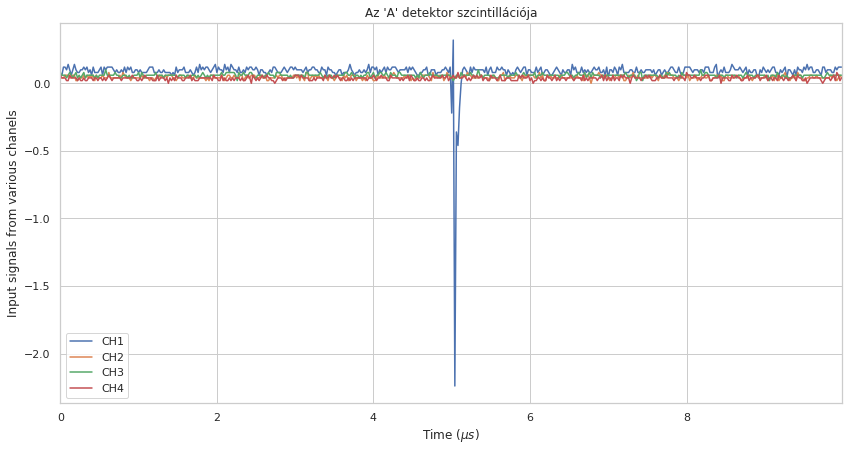

In [67]:
PlotKoinc(time, ch1, ch2, ch3, ch4)

Nem sikerült a koincidenciákon kialakuló négyszögjeleket a scope.sh paranccsal elkapjam, azonban az oszcillátoron szépen látszódtak.

## 3. feladat: Az ingadozások vizsgálata

Kapcsoljon az `A`, a `C` és a `D` szcintillátorokra a rájuk írt _(nominális)_ értéknek megfelelő nagyfeszültséget!
Mérje meg egy percen keresztül, hány $\mu$-t detektál az `ACD` koincidenciában! 
Ezt a mérést ismételje meg többször is egymás után, legalább nyolcszor!
Rögzítse a mérési adatokat és számítsa ki az adatsor szórását! 
Vizsgálja meg, mennyire egyezik ez meg a Poisson-folyamat paraméteréből becsülhető (gyökös) hibával?

| Mérés száma | $N_\mathbf{ACD}$ | Mérés száma | $N_\mathbf{ACD}$ |
|-------------|------------------|-------------|------------------|
| 1           |  203             | 11          |  218
| 2           |  206             | 12          |  222
| 3           |  227             | 13          |  221
| 4           |  202             | 14          |  214
| 5           |  219             | 15          |  207
| 6           |  198             | 16          |  179
| 7           |  198             | 17          |  230
| 8           |  195             | 18          |  213
| 9           |  221             | 19          |  175
| 10          |  237             | 20          |  227

In [103]:
# itt lehet kértékelni a statisztikákat

In [109]:
dist_data = np.array((203, 206, 227, 202, 219, 198, 198, 195, 221, 237,
                      218, 222, 221, 214, 207, 179, 230, 213, 175, 227))

dist_theor = 0

for i in range(0,len(dist_data)):
    dist_theor += (dist_data[i] - dist_data.mean())**2

dist_theor /= len(dist_data)
dist_theor = sqrt(dist_theor)

print("Átlagos számuk:", dist_data.mean())
print("Szórásuk:", dist_final)
print("Szórásuk numpy-val:", np.std(dist_data))

Átlagos számuk: 210.6
Szórásuk: 15.957443404254956
Szórásuk numpy-val: 15.957443404254956


In [105]:
def PlotDist(dist_data):
    fig, axes = plt.subplots(figsize=(14,7))
    
    sns.distplot(dist_data)
    
    plt.show()

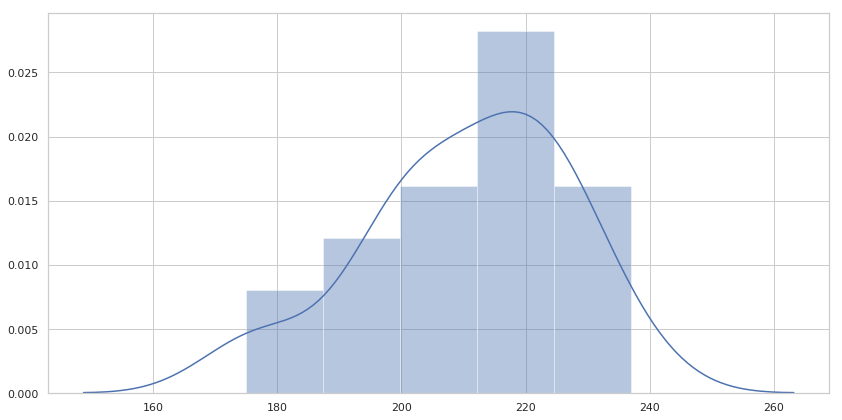

In [106]:
PlotDist(dist_data)

A mérések alapján
* a $\mu$-k átlagos száma, $\langle N_\mathbf{ACD} \rangle = 210.6$
* az empirikus szórás számolt értéke, $\sigma \left( \langle N_\mathbf{ACD} \rangle \right) = $
* A szórás elvi értéke, $\sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_{i} - \overline{x})^2}{N} } = \sqrt{\frac{\sum_{i=1}^{N} \left( N_{i} - \langle N_\mathbf{ACD} \rangle \right)}{20}} = 15.957$

Tapasztalataim összegzése:

## 4. feladat: A detektor hatásfokának feszültségfüggése
Definiálja a hatásfokot az alábbi koincidenciaarány: $$\eta :=\frac{N_\mathbf{ACD}}{N_\mathbf{AD}}.$$ 
Mérje meg a hatásfokot különböző nagyfeszültség megválasztása mellett (legalább kétszer) és méréséről készítsen ábrát.

A `C` szcintillátor nominális feszültsége $U_\mathrm{nom}=1800$ _V_.

| $U_\mathbf{C}$ [_V_] | $\eta_1$ | $\eta_2$ |
|----------------------|----------|----------|
|$U_\mathrm{nom}-200$ | 0.769 | 0.796 |
|$U_\mathrm{nom}-150$ | 0.8995 | 0.929 |
|$U_\mathrm{nom}-100$ | 0.946 | 0.939 |
|$U_\mathrm{nom}-50$  | 0.990 | 0.95 |
|$U_\mathrm{nom}$     | 0.985 | 0.987 |
|$U_\mathrm{nom}+50$  | 0.991 | 0.981 |

#### 1 percig mért értékek esetén

In [125]:
volts = np.array((1600, 1650, 1700, 1750, 1800, 1850))
efficiency = np.array(((153/199, 197/219, 192/203, 201/203, 195/198, 209/211), (172/216, 196/211, 214/228, 209/220, 227/230, 202/206)))

In [127]:
efficiency[0]

array([0.76884422, 0.89954338, 0.94581281, 0.99014778, 0.98484848,
       0.99052133])

In [128]:
# ez itt az ábra helye

In [135]:
def PlotEfficiency(volts, efficiency):
    
    fig, axes = plt.subplots(figsize=(14,7))
    
    axes.scatter(volts, efficiency[0])
    axes.scatter(volts, efficiency[1])
    
    axes.set_xlabel("Voltage ($V$)")
    axes.set_ylabel("Measured efficiency ($\%$)")
    
    axes.set_title("Measured efficiencies for different voltages")
    
    plt.show()

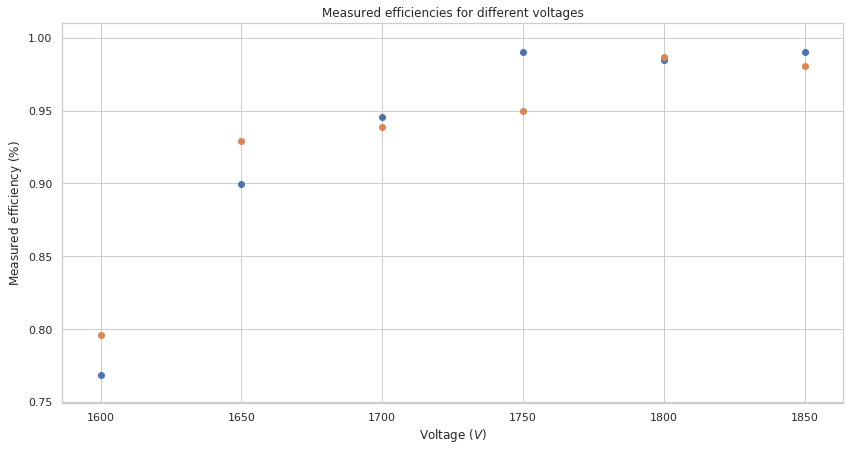

In [136]:
PlotEfficiency(volts, efficiency)

## 5. feladat: A beütések vizsgálata radioaktív forrás jelenlétében

<font color="red">*Figyelem:* ebben a félévben a laborban nem használunk radioaktív izotópokat, ezért ezt a feladat nem kell elvégezni.</font>

Az `A` szcintillátor feszültségét a jegyzet javaslatának megfelelően állítsa a nominálisnál 50 *V*-tal magasabbra. 
A mérések időtartama legyen pár perc hosszú.

Becslés a véletlen háttérre.

* A választott mérési időtartam, $T=$
* Az `A` szcintillátor beütéseinek száma $T$ alatt, $N_\mathbf{A}=$
* Az `D` szcintillátor beütéseinek száma $T$ alatt, $N_\mathbf{D}=$
* Az `AD` koincidenciák száma $T$ alatt, $N_\mathbf{AD}=$

Végezzen mérést Cs$_{137}$ izotóppal a forrást és a detektorok közötti távolságot változtatva.
A mérések alapján meghatározható $N_\mathbf{A}N_\mathbf{D}$ szorzat függvényében a koincidenciák számára ($N_\mathbf{AD}$). 

|Mérés száma| $N_\mathbf{A}$ | $N_\mathbf{D}$ | $N_\mathbf{AD}$ | Elrendezés rövid leírása |
|:-:|-:|-:|-:|:-|
| 1 |  |  |  |  |
| 2 |  |  |  |  |
| 3 |  |  |  |  |
| 4 |  |  |  |  |
| 5 |  |  |  |  |
| 6 |  |  |  |  |
| 7 |  |  |  |  |
| 8 |  |  |  |  |

Illesszen az adatokra egyenest és készítsen róla ábrát!

In [ ]:
# kiértékelés, illesztés és ábra elkészítésének helye

* Az egyenes egyenlete:
* A tényleges koincidenciák száma (a fenti egyenes tengelymetszete $N_\mathbf{A}N_\mathbf{D}=0$), $N^*_\mathbf{AD}=$

## A méréssel kapcsolatos észrevételek

__Kitölteni nem kötelező__: 
* Itt kérjük feltűntetni, hogy mennyi idő volt szükséges a feladatok elvégzéséhez. 
* Itt lehet javaslatot tenni a méréssel kapcsolatban.
* A méréssel kapcsolatban felmerült további ötletek.